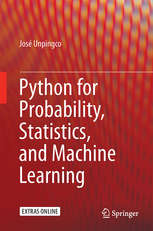

In [1]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [2]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


As we have seen, outside of some  toy problems, it can be very difficult  or
impossible to determine  the probability density distribution of the estimator
of some quantity. The idea behind the bootstrap is that we can use computation
to approximate  these functions which would otherwise be impossible to solve
for analytically. 

Let's start with a simple example. Suppose we have the following set of random
variables, $\lbrace X_1, X_2, \ldots, X_n \rbrace$ where each $X_k \sim F$. In
other words the samples are all drawn from the same unknown distribution $F$.
Having run the experiment, we thereby obtain the following sample set:

$$
\lbrace x_1, x_2, \ldots, x_n \rbrace
$$

 The sample mean is computed from this set as,

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

 The next question is how close is the sample mean to the true mean,
$\theta = \mathbb{E}_F(X)$. Note that the second central moment of $X$ is as
follows:

$$
\mu_2(F) := \mathbb{E}_F (X^2)  - (\mathbb{E}_F (X))^2
$$

 The standard deviation of the sample mean, $\bar{x}$, given $n$
samples from an underlying distribution $F$, is the following:

$$
\sigma(F) = (\mu_2(F)/n)^{1/2}
$$

 Unfortunately, because we have only the set of samples $\lbrace x_1,
x_2, \ldots, x_n \rbrace$ and not $F$ itself, we cannot compute this and
instead must use the estimated standard error,

$$
\bar{\sigma} = (\bar{\mu}_2/n)^{1/2}
$$

 where $\bar{\mu}_2 = \sum (x_i -\bar{x})^2/(n-1) $, which is the
unbiased estimate of $\mu_2(F)$. However, that is not the only way to proceed.
Instead, we could replace $F$ by some estimate, $\hat{F}$ obtained as a
piecewise function of $\lbrace x_1, x_2, \ldots, x_n \rbrace$ by placing
probability mass $1/n$ on each $x_i$. With that in place, we can compute the
estimated standard error as the following:

$$
\hat{\sigma}_B  = (\mu_2(\hat{F})/n)^{1/2}
$$

 which is called the *bootstrap estimate* of the standard error.
Unfortunately, the story effectively ends here. In even a slightly more general
setting, there is no clean formula $\sigma(F)$ within which $F$ can be swapped
for $\hat{F}$.

This is where the computer saves the day. We actually do not need to know the
formula $\sigma(F)$ because we can compute it using a resampling method. The
key idea is to sample with replacement from $\lbrace x_1, x_2, \ldots, x_n
\rbrace$. The new set of $n$ independent draws (with replacement) from this set
is the *bootstrap sample*,

$$
y^* = \lbrace x_1^*, x_2^*, \ldots, x_n^* \rbrace
$$

The Monte Carlo algorithm proceeds by first by selecting a large number  of
bootstrap samples, $\lbrace y^*_k\rbrace$, then computing the statistic on each
of these samples, and then computing the sample standard deviation of the
results in the usual way. Thus, the bootstrap estimate of the statistic
$\theta$ is the following,

$$
\hat{\theta}^*_B = \frac{1}{B} \sum_k \hat{\theta}^*(k)
$$

 with the corresponding square of the sample standard deviation as

$$
\hat{\sigma}_B^2 = \frac{1}{B-1} \sum_k (\hat{\theta}^*(k)-\hat{\theta}^*_B )^2
$$

 The process is much simpler than  the notation implies.
Let's explore this with a simple example using Python. The next block
of code sets up some samples from a $\beta(3,2)$ distribution,

In [3]:
import numpy as np
_=np.random.seed(123456)

In [4]:
import numpy as np
from scipy import stats
rv = stats.beta(3,2)
xsamples = rv.rvs(50)

 Because this is simulation data, we already know that the
mean is $\mu_1 = 3/5$ and the standard deviation of the sample mean
for $n=50$ is $\bar{\sigma} =1/\sqrt {1250}$, which we will verify
this later.

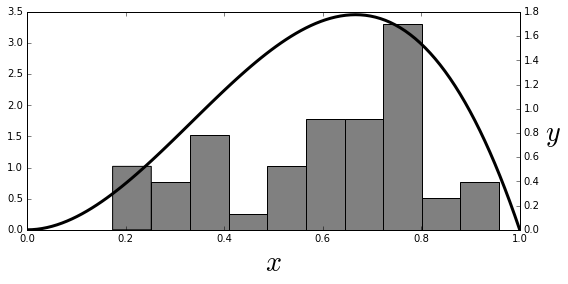

In [5]:
%matplotlib inline

from matplotlib.pylab import subplots
fig,ax = subplots()
fig.set_size_inches(8,4)
_=ax.hist(xsamples,normed=True,color='gray')
ax2 = ax.twinx()
_=ax2.plot(np.linspace(0,1,100),rv.pdf(np.linspace(0,1,100)),lw=3,color='k')
_=ax.set_xlabel('$x$',fontsize=28)
_=ax2.set_ylabel('  $y$',fontsize=28,rotation='horizontal')
fig.tight_layout()
#fig.savefig('fig-statistics/Bootstrap_001.png')

<!-- dom:FIGURE: [fig-statistics/Bootstrap_001.png, width=500 frac=0.85] The $\beta(3,2)$ distribution and the histogram that approximates it. <div id="fig:Bootstrap_001"></div> -->
<!-- begin figure -->
<div id="fig:Bootstrap_001"></div>

<p>The $\beta(3,2)$ distribution and the histogram that approximates it.</p>
<img src="fig-statistics/Bootstrap_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Bootstrap_001) shows the $\beta(3,2)$ distribution and
the corresponding histogram of the samples. The histogram represents
$\hat{F}$ and is the distribution we sample from to obtain the
bootstrap samples. As shown, the $\hat{F}$ is a pretty crude estimate
for the $F$ density (smooth solid line), but that's not a serious
problem insofar as the following bootstrap estimates are concerned.
In fact, the approximation $\hat{F}$ has a naturally tendency to
pull towards where most of the probability mass is. This is a
feature, not a bug; and is the underlying mechanism for why
bootstrapping works, but the formal proofs that exploit this basic
idea are far out of our scope here.  The next block generates the
bootstrap samples

In [6]:
yboot = np.random.choice(xsamples,(100,50))
yboot_mn = yboot.mean()

 and the bootstrap estimate is therefore,

In [7]:
np.std(yboot.mean(axis=1)) # approx sqrt(1/1250)

0.025598763883825818

 [Figure](#fig:Bootstrap_002) shows the distribution of computed
sample means from the bootstrap samples.  As promised, the next block
shows how to use `sympy.stats` to compute the $\beta(3,2)$ parameters we quoted
earlier.

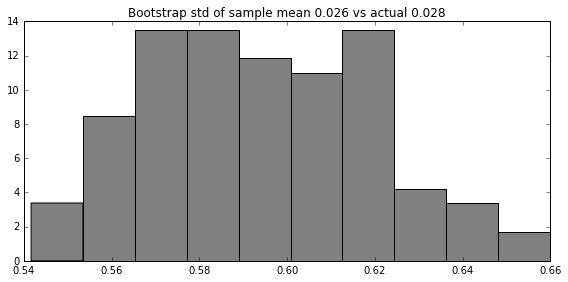

In [8]:
fig,ax = subplots()
fig.set_size_inches(8,4)
_=ax.hist(yboot.mean(axis=1),normed=True,color='gray')
_=ax.set_title('Bootstrap std of sample mean %3.3f vs actual %3.3f'%
             (np.std(yboot.mean(axis=1)),np.sqrt(1/1250.)))
fig.tight_layout()
#fig.savefig('fig-statistics/Bootstrap_002.png')

<!-- dom:FIGURE: [fig-statistics/Bootstrap_002.png, width=500 frac=0.85] For each bootstrap draw, we compute the sample mean. This is the histogram of those sample means that will be used to compute the bootstrap estimate of the standard deviation. <div id="fig:Bootstrap_002"></div> -->
<!-- begin figure -->
<div id="fig:Bootstrap_002"></div>

<p>For each bootstrap draw, we compute the sample mean. This is the histogram of those sample means that will be used to compute the bootstrap estimate of the standard deviation.</p>
<img src="fig-statistics/Bootstrap_002.png" width=500>

<!-- end figure -->

In [9]:
import sympy as S
import sympy.stats
for i in range(50): # 50 samples
    # load sympy.stats Beta random variables
    # into global namespace using exec
    execstring = "x%d = S.stats.Beta('x'+str(%d),3,2)"%(i,i)
    exec(execstring) 

# populate xlist with the sympy.stats random variables
# from above
xlist = [eval('x%d'%(i)) for i in range(50) ]
# compute sample mean
sample_mean = sum(xlist)/len(xlist)
# compute expectation of sample mean
sample_mean_1 = S.stats.E(sample_mean)
# compute 2nd moment of sample mean
sample_mean_2 = S.stats.E(S.expand(sample_mean**2))
# standard deviation of sample mean
# use sympy sqrt function
sigma_smn = S.sqrt(sample_mean_2-sample_mean_1**2) # 1/sqrt(1250)
print sigma_smn

sqrt(-1/(20000*beta(3, 2)**2) + 1/(1500*beta(3, 2)))


**Programming Tip.**

Using the `exec` function enables the creation of a sequence of Sympy
random variables. Sympy has the `var` function which can automatically
create a sequence of Sympy symbols, but there is no corresponding
function in the statistics module to do this for random variables.



<!-- @@@CODE src-statistics/Bootstrap.py from-to:^import sympy as S@^print sigma_smn -->

<!-- p.505 casella -->

**Example.** Recall the delta method from the section ref{sec:delta_method}.  Suppose we have a set of Bernoulli coin-flips
($X_i$) with probability of head $p$. Our maximum likelihood estimator
of $p$ is $\hat{p}=\sum X_i/n$ for $n$ flips.  We know this estimator
is unbiased with $\mathbb{E}(\hat{p})=p$ and $\mathbb{V}(\hat{p}) =
p(1-p)/n$. Suppose we want to use the data to estimate the variance of
the Bernoulli trials ($\mathbb{V}(X)=p(1-p)$). By the notation the
delta method, $g(x) = x(1-x)$. By the plug-in principle, our maximum
likelihood estimator of this variance is then $\hat{p}(1-\hat{p})$. We
want the variance of this quantity.  Using the results of the delta
method, we have

$$
\begin{align*}
\mathbb{V}(g(\hat{p})) &=(1-2\hat{p})^2\mathbb{V}(\hat{p})  \\\
\mathbb{V}(g(\hat{p})) &=(1-2\hat{p})^2\frac{\hat{p}(1-\hat{p})}{n} \\\
\end{align*}
$$

 Let's see how useful this is with a short simulation.

In [10]:
import numpy as np
np.random.seed(123)

In [11]:
from scipy import stats
import numpy as np
p= 0.25 # true head-up probability
x = stats.bernoulli(p).rvs(10)
print x

[0 0 0 0 0 0 1 0 0 0]


 The maximum likelihood estimator of $p$ is $\hat{p}=\sum X_i/n$,

In [12]:
phat = x.mean()
print phat

0.1


 Then, plugging this into the delta method approximant above,

In [13]:
print (1-2*phat)**2*(phat)**2/10.

0.00064


 Now, let's try this using the bootstrap estimate of the variance

In [14]:
phat_b=np.random.choice(x,(50,10)).mean(1)
print np.var(phat_b*(1-phat_b))

0.005049


 This shows that the delta method's estimated variance
is different from the bootstrap method, but which one is better?
For this situation we can solve for this directly using Sympy

In [15]:
import sympy as S
from sympy.stats import E, Bernoulli
xdata =[Bernoulli(i,p) for i in S.symbols('x:10')]
ph = sum(xdata)/float(len(xdata))
g = ph*(1-ph)

**Programming Tip.**

The argument in the `S.symbols('x:10')` function returns a sequence of Sympy
symbols named `x1,x2` and so on. This is shorthand for creating and naming each
symbol sequentially.



 Note that `g` is the $g(\hat{p})=\hat{p}(1- \hat{p})$ 
whose variance we are trying to estimate. Then,
we can plug in for the estimated $\hat{p}$ and get the correct
value for the variance,

In [16]:
print E(g**2) - E(g)**2

0.00442968750000000


 This case is generally representative --- the delta method tends
to underestimate the variance and the bootstrap estimate is better here.


## Parametric Bootstrap

In the previous example, we used the $\lbrace x_1, x_2, \ldots, x_n \rbrace $
samples themselves as the basis for $\hat{F}$ by weighting each with $1/n$. An
alternative is to *assume* that the samples come from a particular
distribution, estimate the parameters of that distribution from the sample set,
and then use the bootstrap mechanism to draw samples from the assumed
distribution, using the so-derived parameters. For example, the next code block
does this for a normal distribution.

In [17]:
rv = stats.norm(0,2)
xsamples = rv.rvs(45)
# estimate mean and var from xsamples
mn_ = np.mean(xsamples)
std_ = np.std(xsamples)
# bootstrap from assumed normal distribution with
# mn_,std_ as parameters
rvb = stats.norm(mn_,std_) #plug-in distribution
yboot = rvb.rvs(1000)

<!-- @@@CODE src-statistics/Bootstrap.py from-to:^# In\[7\]:@^yboot -->

 Recall the sample variance estimator is the following:

$$
S^2 = \frac{1}{n-1} \sum (X_i-\bar{X})^2
$$

 Assuming that the samples are normally distributed, this
means that $(n-1)S^2/\sigma^2$ has a chi-squared distribution with
$n-1$ degrees of freedom. Thus, the variance, $\mathbb{V}(S^2) = 2
\sigma^4/(n-1) $. Likewise, the MLE plug-in estimate for this is
$\mathbb{V}(S^2) = 2 \hat{\sigma}^4/(n-1)$ The following code computes
the variance of the sample variance, $S^2$ using the MLE and bootstrap
methods.

In [18]:
# MLE-Plugin Variance of the sample mean 
print 2*(std_**2)**2/9. # MLE plugin
# Bootstrap variance of the sample mean 
print yboot.var()
# True variance of sample mean 
print 2*(2**2)**2/9.

2.22670148618
3.29467885682
3.55555555556


<!-- @@@CODE src-statistics/Bootstrap.py from-to:^# In\[8\]:@^# end8 -->

 This shows that the bootstrap estimate is better here than the MLE
plugin estimate.

Note that this technique becomes even more powerful with multivariate
distributions with many parameters because all the mechanics are the same.
Thus, the bootstrap is a great all-purpose method for computing standard
errors, but, in the limit,  is it converging to the correct value? This is the
question of *consistency*. Unfortunately, to answer this question requires more
and deeper mathematics than we can get into here.  The short answer is that for
estimating standard errors, the bootstrap is a consistent estimator in a wide
range of cases and so it definitely belongs in your toolkit.